In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read(myname):
    df=pd.read_parquet(myname, engine='pyarrow')
    df['timestamp']=pd.to_datetime(df['exch_ts'], unit='ns')
    df.set_index('timestamp', inplace=True)
    return df

In [28]:
def get_price(df,myside):
    price = df[df['side'] == myside]['price'].resample('1S').mean()
    return price.interpolate()

In [41]:
df_fut=read('trades_fut.parquet')
df_fut1=get_price(df_fut,1)[2:]
df_futm1=get_price(df_fut,-1)

df_spt=read('trades_spt.parquet')
df_spt1=get_price(df_spt,1)[1:]
df_sptm1=get_price(df_spt,-1)[1:]


df=pd.DataFrame()
df['fut_ask']=df_fut1.values
df['fut_bid']=df_futm1.values
df['fut_mid_price']=0.5 * (df['fut_ask']+df['fut_bid'])
df['spt_ask']=df_spt1.values
df['spt_bid']=df_sptm1.values
df['spt_mid_price']=0.5 * (df['spt_ask']+df['spt_bid'])
df.index=df_spt1.index

df

,fut_ask,fut_bid,fut_mid_price,spt_ask,spt_bid,spt_mid_price
timestamp,,,,,,
2021-04-01 00:00:01,1923.697308,1922.937021,1923.317164,1919.761481,1919.564000,1919.662741
2021-04-01 00:00:02,1924.261322,1923.828214,1924.044768,1920.165392,1920.127778,1920.146585
2021-04-01 00:00:03,1924.298704,1924.185909,1924.242306,1920.787143,1920.529231,1920.658187
2021-04-01 00:00:04,1925.243898,1925.246364,1925.245131,1921.356957,1921.713889,1921.535423
2021-04-01 00:00:05,1925.547826,1925.545000,1925.546413,1921.816486,1921.698571,1921.757529
2021-04-01 00:00:06,1926.120316,1925.771136,1925.945726,1922.272105,1921.928571,1922.100338
2021-04-01 00:00:07,1926.670698,1926.045714,1926.358206,1922.550000,1922.428889,1922.489444
2021-04-01 00:00:08,1927.007733,1926.886316,1926.947025,1922.887941,1922.885000,1922.886471
2021-04-01 00:00:09,1927.382035,1927.249000,1927.315517,1923.153571,1923.002000,1923.077786


In [111]:
from tqdm import tqdm

In [121]:
k=1.0012
alpha=1*1e-3
df['signal_greater']=((df['fut_mid_price']/df['spt_mid_price']) > (k+alpha)).shift(1)
df['signal_greater'].fillna(False,inplace=True)
df['signal_greater']=df['signal_greater'].astype(int)
df['signal_less']=((df['fut_mid_price']/df['spt_mid_price']) < (k-alpha)).shift(1)
df['signal_less'].fillna(False,inplace=True)
df['signal_less']=df['signal_less'].astype(int)

#df['spread']=2*(df['fut_ask']-df['fut_bid'])/(df['fut_ask']+df['fut_bid'])*10000

df['last_zakrutie']=(np.arange(len(df))*(1-df['signal_greater'])*(1-df['signal_less']))
df['last_zakrutie']=df['last_zakrutie'].replace({0:np.nan}).ffill()
df['last_zakrutie']=df['last_zakrutie'].fillna(0).astype(int)


df['neprav_tek_amt_of_fut']=(-df['signal_greater']+df['signal_less']).cumsum()
df['neprav_tek_amt_of_spt']=(df['signal_greater']-df['signal_less']).cumsum()

tek_amt_of_fut=np.array(df['neprav_tek_amt_of_fut'])
tek_amt_of_spt=np.array(df['neprav_tek_amt_of_spt'])
for i in tqdm(range(len(df))):
    tek_amt_of_fut[i]-=df['neprav_tek_amt_of_fut'][df['last_zakrutie'][i]]
    tek_amt_of_spt[i]-=df['neprav_tek_amt_of_spt'][df['last_zakrutie'][i]]
    
df['tek_amt_of_fut']=tek_amt_of_fut
df['tek_amt_of_spt']=tek_amt_of_spt
df['if_tek_amt_of_fut_posit']=(df['tek_amt_of_fut'] >0).astype(int)
df['if_tek_amt_of_spt_posit']=(df['tek_amt_of_spt'] >0).astype(int)

money_change_per_moment=df['signal_greater']*((1)*df['fut_bid']-df['fut_mid_price']/df['spt_mid_price']*df['spt_ask'])+\
                        df['signal_less']*((-1)*df['fut_bid']+df['fut_mid_price']/df['spt_mid_price']*df['spt_ask'])+\
                        (1-df['signal_greater'])*(1-df['signal_less'])*df['tek_amt_of_fut']*((df['if_tek_amt_of_fut_posit']*df['fut_bid']+(1-df['if_tek_amt_of_fut_posit'])*df['fut_ask']))+\
                        (1-df['signal_greater'])*(1-df['signal_less'])*df['tek_amt_of_spt']*((df['if_tek_amt_of_spt_posit']*df['spt_bid']+(1-df['if_tek_amt_of_spt_posit'])*df['spt_ask']))





value_of_inventer_trajectory=df['tek_amt_of_fut']*df['fut_mid_price']+df['tek_amt_of_spt']*df['spt_mid_price']




  0%|          | 0/86399 [00:00<?, ?it/s]

  0%|          | 222/86399 [00:00<00:38, 2219.36it/s]

  0%|          | 359/86399 [00:00<00:46, 1868.61it/s]

  1%|          | 447/86399 [00:00<01:04, 1339.43it/s]

  1%|          | 573/86399 [00:00<01:05, 1314.10it/s]

  1%|          | 698/86399 [00:00<01:06, 1281.06it/s]

  1%|          | 803/86399 [00:00<01:19, 1074.87it/s]

  1%|          | 904/86399 [00:00<01:21, 1054.32it/s]

  1%|          | 1019/86399 [00:00<01:18, 1080.91it/s]

  1%|▏         | 1123/86399 [00:00<01:28, 963.95it/s] 

  2%|▏         | 1314/86399 [00:01<01:15, 1132.15it/s]

  2%|▏         | 1438/86399 [00:01<01:26, 986.50it/s] 

  2%|▏         | 1631/86399 [00:01<01:13, 1147.58it/s]

  2%|▏         | 1764/86399 [00:01<01:12, 1172.09it/s]

  2%|▏         | 1894/86399 [00:01<01:11, 1183.43it/s]

  2%|▏         | 2022/86399 [00:01<01:14, 1131.78it/s]

  2%|▏         | 2142/86399 [00:01<01:13, 1145.40it/s]

  3%|▎         | 2262/86399 [00:01<01:19, 1059.60it/s]

  3%|▎    

 64%|██████▍   | 55553/86399 [00:29<00:16, 1820.69it/s]

 65%|██████▍   | 55738/86399 [00:29<00:17, 1739.61it/s]

 65%|██████▍   | 55918/86399 [00:29<00:17, 1756.87it/s]

 65%|██████▌   | 56239/86399 [00:29<00:14, 2032.07it/s]

 65%|██████▌   | 56484/86399 [00:29<00:13, 2141.43it/s]

 66%|██████▌   | 56715/86399 [00:29<00:13, 2188.81it/s]

 66%|██████▌   | 56944/86399 [00:30<00:13, 2212.27it/s]

 66%|██████▌   | 57233/86399 [00:30<00:12, 2379.14it/s]

 67%|██████▋   | 57497/86399 [00:30<00:11, 2451.52it/s]

 67%|██████▋   | 57799/86399 [00:30<00:11, 2596.45it/s]

 67%|██████▋   | 58102/86399 [00:30<00:10, 2712.77it/s]

 68%|██████▊   | 58475/86399 [00:30<00:09, 2953.61it/s]

 68%|██████▊   | 58783/86399 [00:30<00:09, 2990.22it/s]

 68%|██████▊   | 59118/86399 [00:30<00:08, 3088.89it/s]

 69%|██████▉   | 59456/86399 [00:30<00:08, 3170.05it/s]

 69%|██████▉   | 59783/86399 [00:30<00:08, 3190.37it/s]

 70%|██████▉   | 60183/86399 [00:31<00:07, 3396.16it/s]

 70%|███████   | 60529/86399 [0

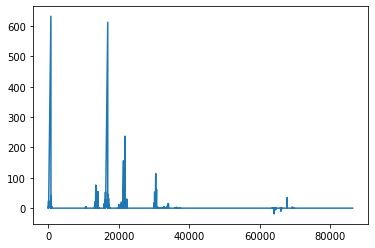

In [122]:
plt.plot(np.arange(len(tek_amt_of_spt)),tek_amt_of_spt)

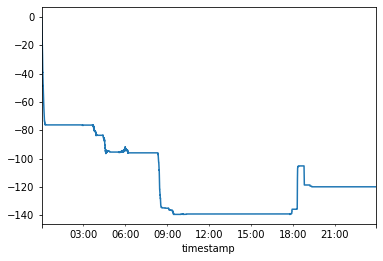

In [123]:
money_change_per_moment.cumsum().plot()

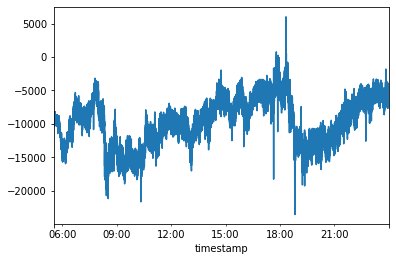

In [126]:
pnl_trajectory[20000:].plot()

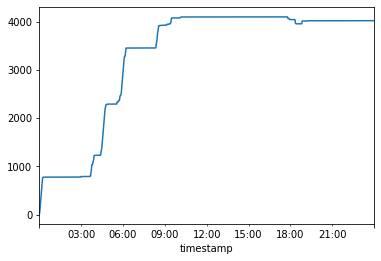

In [88]:
df['tek_amt_of_fut'].plot()

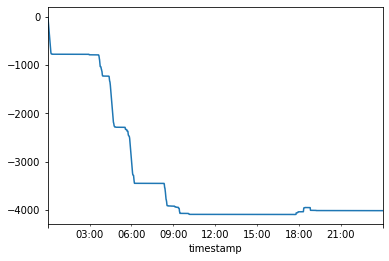

In [89]:
df['tek_amt_of_spt'].plot()

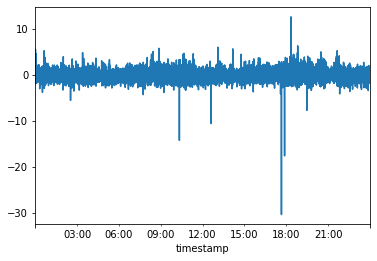

In [71]:
df.spread.plot()

In [113]:
df

,fut_ask,fut_bid,fut_mid_price,spt_ask,spt_bid,spt_mid_price,signal,signal_greater,signal_less,tek_amt_of_fut,tek_amt_of_spt,spread,last_zakrutie,neprav_tek_amt_of_fut,neprav_tek_amt_of_spt
timestamp,,,,,,,,,,,,,,,
2021-04-01 00:00:01,1923.697308,1922.937021,1923.317164,1919.761481,1919.564000,1919.662741,False,0,0,0,0,3.952996,0,0,0
2021-04-01 00:00:02,1924.261322,1923.828214,1924.044768,1920.165392,1920.127778,1920.146585,False,0,0,0,0,2.251026,1,0,0
2021-04-01 00:00:03,1924.298704,1924.185909,1924.242306,1920.787143,1920.529231,1920.658187,False,0,0,0,0,0.586177,2,0,0
2021-04-01 00:00:04,1925.243898,1925.246364,1925.245131,1921.356957,1921.713889,1921.535423,False,0,0,0,0,-0.012805,3,0,0
2021-04-01 00:00:05,1925.547826,1925.545000,1925.546413,1921.816486,1921.698571,1921.757529,False,0,0,0,0,0.014677,4,0,0
2021-04-01 00:00:06,1926.120316,1925.771136,1925.945726,1922.272105,1921.928571,1922.100338,False,0,0,0,0,1.813032,5,0,0
2021-04-01 00:00:07,1926.670698,1926.045714,1926.358206,1922.550000,1922.428889,1922.489444,False,0,0,0,0,3.244378,6,0,0
2021-04-01 00:00:08,1927.007733,1926.886316,1926.947025,1922.887941,1922.885000,1922.886471,False,0,0,0,0,0.630103,7,0,0
2021-04-01 00:00:09,1927.382035,1927.249000,1927.315517,1923.153571,1923.002000,1923.077786,False,0,0,0,0,0.690260,8,0,0


In [114]:
mydict(df.columns

Index(['fut_ask', 'fut_bid', 'fut_mid_price', 'spt_ask', 'spt_bid',
       'spt_mid_price', 'signal', 'signal_greater', 'signal_less',
       'tek_amt_of_fut', 'tek_amt_of_spt', 'spread', 'last_zakrutie',
       'neprav_tek_amt_of_fut', 'neprav_tek_amt_of_spt'],
      dtype='object')